# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Pre-Processing and Training Data](#4_Pre-Processing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load Data](#4.4_Load_Data)
  * [4.5 Explore the Data](#4.5_Explore_Data)
  * [4.6 Pre-processing](#4.6_Pre_processing)
    * [4.6.1 Handle missing values](#4.6_1_Missing)   
    * [4.6.2 Duplicate Records](#4.6_2_Duplicate)      
    * [4.6.3 Feature Selection](#4.6_3_Feature)     
    * [4.6.4 Text Vectorization](#4.6_4_Vectorization)      
  * [4.7 Train-Test Split](#4.7_Split)    
  * [4.8 Save dataframel](#4.8_Save)   
  * [4.9 Summary](#4.9_Summary)

## 4.2 Introduction<a id='4.2_Introduction'></a>

This notebook focuses on the pre-processing and training steps for the Amazon Fine Food Reviews dataset. The dataset includes various features such as review text, scoring, helpfulness, and user profiles, with the goal of predicting whether a review is fake. The pre-processing steps involve handling missing values, creating new features, and vectorizing text data using TF-IDF. 

## 4.3 Imports<a id='4.3_Imports'></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\armeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\armeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 4.4 Load Data<a id='4.4_Load_Data'></a>

In [2]:
amazon_data = pd.read_csv('amazon_data_eda.csv')
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText,FakeReviews,TextLength,WordCount,Sentiment
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,...,"['tried', 'couple', 'brands', 'glutenfree', 's...","['crunchy', 'good', 'glutenfree', 'sandwich', ...","['tried', 'couple', 'brand', 'glutenfree', 'sa...","['crunchy', 'good', 'glutenfree', 'sandwich', ...",crunchi & good gluten-fre sandwich cooki !,have tri a coupl of other brand of gluten-fre ...,0.0,485,84,0.319318
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,...,"['cat', 'loves', 'treats', 'ever', 'cant', 'fi...","['great', 'kitty', 'treats']","['cat', 'love', 'treat', 'ever', 'cant', 'find...","['great', 'kitty', 'treat']",great kitti treat,my cat love these treat . if ever i ca n't fin...,0.0,490,99,0.435370
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,...,"['little', 'less', 'expected', 'tends', 'muddy...","['coffee', 'taste']","['little', 'le', 'expected', 'tends', 'muddy',...","['coffee', 'taste']",coffe tast,a littl less than i expect . it tend to have a...,0.0,136,28,-0.010833
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",...,"['first', 'frosted', 'miniwheats', 'original',...","['miniwheats', 'big']","['first', 'frosted', 'miniwheats', 'original',...","['miniwheats', 'big']",so the mini-wheat were too big ?,"first there wa frost mini-wheat , in origin si...",0.0,1631,294,0.159401
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,...,"['want', 'congratulate', 'graphic', 'artist', ...","['great', 'taste']","['want', 'congratulate', 'graphic', 'artist', ...","['great', 'taste']",great tast . . .,and i want to congratul the graphic artist for...,0.0,649,122,0.235565


## 4.5 Explore the Data<a id='4.5_Explore_Data'></a>

In [3]:
amazon_data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,HelpfulnessRatio,FakeReviews,TextLength,WordCount,Sentiment
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,284099.217770,1.771590,2.258040,4.189880,1.296134e+09,0.408624,0.000920,436.306800,80.260440,0.243103
std,163871.960801,7.846071,8.526657,1.306868,4.807836e+07,0.462236,0.030318,445.663953,79.598471,0.225739
min,3.000000,0.000000,0.000000,1.000000,9.444384e+08,0.000000,0.000000,30.000000,4.000000,-1.000000
25%,142751.000000,0.000000,0.000000,4.000000,1.271203e+09,0.000000,0.000000,179.000000,33.000000,0.107143
50%,283915.000000,0.000000,1.000000,5.000000,1.310947e+09,0.000000,0.000000,301.000000,56.000000,0.233333
75%,425465.750000,2.000000,2.000000,5.000000,1.332634e+09,1.000000,0.000000,528.000000,98.000000,0.374653
max,568446.000000,580.000000,593.000000,5.000000,1.351210e+09,3.000000,1.000000,11321.000000,1901.000000,1.000000


In [4]:
amazon_data.shape

(100000, 24)

In [5]:
amazon_data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    9
Text                       0
HelpfulnessRatio           0
ReviewTime                 0
CleanedText                0
CleanedSummary            46
TokenizedText              0
TokenizedSummary           0
LemmatizedText             0
LemmatizedSummary          0
StemmedSummary             9
StemmedText                0
FakeReviews                0
TextLength                 0
WordCount                  0
Sentiment                  0
dtype: int64

In [6]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      100000 non-null  int64  
 1   ProductId               100000 non-null  object 
 2   UserId                  100000 non-null  object 
 3   ProfileName             100000 non-null  object 
 4   HelpfulnessNumerator    100000 non-null  int64  
 5   HelpfulnessDenominator  100000 non-null  int64  
 6   Score                   100000 non-null  int64  
 7   Time                    100000 non-null  int64  
 8   Summary                 99991 non-null   object 
 9   Text                    100000 non-null  object 
 10  HelpfulnessRatio        100000 non-null  float64
 11  ReviewTime              100000 non-null  object 
 12  CleanedText             100000 non-null  object 
 13  CleanedSummary          99954 non-null   object 
 14  TokenizedText        

In [7]:
for x in amazon_data.columns:
    print(f'{x} has value counts -- {amazon_data[x].nunique()}')

Id has value counts -- 100000
ProductId has value counts -- 31698
UserId has value counts -- 71536
ProfileName has value counts -- 64663
HelpfulnessNumerator has value counts -- 148
HelpfulnessDenominator has value counts -- 156
Score has value counts -- 5
Time has value counts -- 2699
Summary has value counts -- 71666
Text has value counts -- 87592
HelpfulnessRatio has value counts -- 478
ReviewTime has value counts -- 2699
CleanedText has value counts -- 87584
CleanedSummary has value counts -- 63533
TokenizedText has value counts -- 87554
TokenizedSummary has value counts -- 58653
LemmatizedText has value counts -- 87554
LemmatizedSummary has value counts -- 58046
StemmedSummary has value counts -- 66799
StemmedText has value counts -- 87565
FakeReviews has value counts -- 2
TextLength has value counts -- 2689
WordCount has value counts -- 721
Sentiment has value counts -- 32836


## 4.6 Pre-processing<a id='4.6_Pre_processing'></a>

### 4.6.1 Handle missing values<a id='4.6_1_Missing'></a>

In [8]:
# Check for missing values
missing_values = amazon_data.isnull().sum()
print(missing_values)

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    9
Text                       0
HelpfulnessRatio           0
ReviewTime                 0
CleanedText                0
CleanedSummary            46
TokenizedText              0
TokenizedSummary           0
LemmatizedText             0
LemmatizedSummary          0
StemmedSummary             9
StemmedText                0
FakeReviews                0
TextLength                 0
WordCount                  0
Sentiment                  0
dtype: int64


In [9]:
# Fill missing values in the 'HelpfulnessRatio' column with 0
amazon_data['HelpfulnessRatio'].fillna(0, inplace=True)

In [10]:
# Drop rows with missing values in critical columns
amazon_data = amazon_data.dropna(subset=['Summary', 'Text', 'CleanedSummary'])

In [11]:
# Check for missing values
missing_values = amazon_data.isnull().sum()
print(missing_values)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
HelpfulnessRatio          0
ReviewTime                0
CleanedText               0
CleanedSummary            0
TokenizedText             0
TokenizedSummary          0
LemmatizedText            0
LemmatizedSummary         0
StemmedSummary            0
StemmedText               0
FakeReviews               0
TextLength                0
WordCount                 0
Sentiment                 0
dtype: int64


### 4.6.2 Handle Duplicate Records<a id='4.6_2_Duplicate'></a>

In [12]:
amazon_data.shape

(99954, 24)

In [13]:
# List of columns to check for duplicates, excluding 'Id'
columns_no_id = [col for col in amazon_data.columns if col != 'Id']

# Check for duplicate records based on all columns except 'Id'
duplicate_records = amazon_data[amazon_data.duplicated(subset=columns_no_id, keep=False)]

In [14]:
amazon_data = amazon_data[~amazon_data.index.isin(duplicate_records.index)]
amazon_data.shape

(99928, 24)

### 4.6.3 Feature Selection<a id='4.6_3_Feature'></a>

In [15]:
!pip install textblob      

import textblob           
from textblob import TextBlob

In [21]:
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary,StemmedSummary,StemmedText,FakeReviews,TextLength,WordCount,Sentiment
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,...,"[tried, couple, brands, glutenfree, sandwich, ...","[crunchy, good, glutenfree, sandwich, cookies]","[tried, couple, brand, glutenfree, sandwich, c...","[crunchy, good, glutenfree, sandwich, cooky]","[crunchi, good, glutenfre, sandwich, cooki]","[tri, coupl, brand, glutenfre, sandwich, cooki...",0.0,485,84,0.319318
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,...,"[cat, loves, treats, ever, cant, find, house, ...","[great, kitty, treats]","[cat, love, treat, ever, cant, find, house, po...","[great, kitty, treat]","[great, kitti, treat]","[cat, love, treat, ever, cant, find, hous, pop...",0.0,490,99,0.435370
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,...,"[little, less, expected, tends, muddy, taste, ...","[coffee, taste]","[little, le, expected, tends, muddy, taste, ex...","[coffee, taste]","[coffe, tast]","[littl, less, expect, tend, muddi, tast, expec...",0.0,136,28,-0.010833
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",...,"[first, frosted, miniwheats, original, size, f...","[miniwheats, big]","[first, frosted, miniwheats, original, size, f...","[miniwheats, big]","[miniwheat, big]","[first, frost, miniwheat, origin, size, frost,...",0.0,1631,294,0.159401
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,...,"[want, congratulate, graphic, artist, putting,...","[great, taste]","[want, congratulate, graphic, artist, putting,...","[great, taste]","[great, tast]","[want, congratul, graphic, artist, put, entir,...",0.0,649,122,0.235565


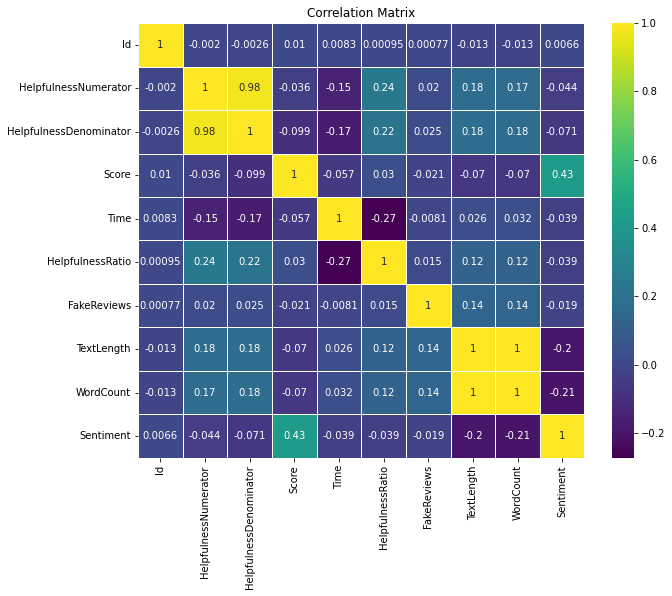

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = amazon_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

he correlation matrix analysis of the Amazon reviews dataset reveals several key insights. Notably, the HelpfulnessNumerator and HelpfulnessDenominator features are highly correlated (0.98) as expected. The Score feature shows a moderate positive correlation (0.43) with Sentiment, indicating that higher-rated reviews generally express more positive sentiments. The FakeReviews feature, our target variable, shows very weak correlations with other features. Additionally, TextLength and WordCount are perfectly correlated, as expected. These insights suggest the need for advanced feature engineering and sophisticated modeling techniques to effectively predict fake reviews. Furthermore, handling class imbalance in the dataset will be crucial for enhancing model performance.

## 4.7 Clean data<a id='4.6_3_Clean'></a>

In [17]:
# Tokenize text
amazon_data['TokenizedText'] = amazon_data['CleanedText'].apply(lambda x: x.split())
amazon_data['TokenizedSummary'] = amazon_data['CleanedSummary'].apply(lambda x: x.split())

# Remove stopwords
stop_words = set(stopwords.words('english'))
amazon_data['TokenizedText'] = amazon_data['TokenizedText'].apply(lambda x: [word for word in x if word not in stop_words])
amazon_data['TokenizedSummary'] = amazon_data['TokenizedSummary'].apply(lambda x: [word for word in x if word not in stop_words])

# Ensure text is not empty after removing stopwords
amazon_data = amazon_data[amazon_data['TokenizedText'].str.len() > 0]

# Lemmatize text
lemmatizer = WordNetLemmatizer()
amazon_data['LemmatizedText'] = amazon_data['TokenizedText'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
amazon_data['LemmatizedSummary'] = amazon_data['TokenizedSummary'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Stem text
stemmer = PorterStemmer()
amazon_data['StemmedText'] = amazon_data['TokenizedText'].apply(lambda x: [stemmer.stem(word) for word in x])
amazon_data['StemmedSummary'] = amazon_data['TokenizedSummary'].apply(lambda x: [stemmer.stem(word) for word in x])

# Calculate text length and word count
amazon_data['TextLength'] = amazon_data['Text'].apply(len)
amazon_data['WordCount'] = amazon_data['Text'].apply(lambda x: len(x.split()))

# Display the preprocessed dataframe
print(amazon_data.head())

       Id   ProductId          UserId             ProfileName  \
0  165257  B000EVG8J2  A1L01D2BD3RKVO  B. Miller "pet person"   
1  231466  B0000BXJIS  A3U62RE5XZDP0G                   Marty   
2  427828  B008FHUFAU   AOXC0JQQZGGB6         Kenneth Shevlin   
3  433955  B006BXV14E  A3PWPNZVMNX3PA             rareoopdvds   
4   70261  B007I7Z3Z0  A1XNZ7PCE45KK7                  Og8ys1   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      5  1268179200   
1                     0                       0      5  1298937600   
2                     0                       2      3  1224028800   
3                     0                       1      2  1335312000   
4                     0                       2      5  1334707200   

                                        Summary  \
0  Crunchy & Good Gluten-Free Sandwich Cookies!   
1                            great kitty treats   
2                                  

## 4.8 Train-Test Split<a id='4.8_Split'></a>

In [18]:
# Train-test split
X = amazon_data['LemmatizedText'].apply(lambda x: ' '.join(x))
y = amazon_data['FakeReviews']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.9 Text Vectorization<a id='4.9_Vectorization'></a>

In [19]:
# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## 4.8 Save dataframe<a id='4.8_Save'></a>

In [20]:
# Save the preprocessed data and vectorizer
amazon_data.to_csv('preprocessed_amazon_data.csv', index=False)

## 4.9 Summary<a id='4.9_Summary'></a>

This notebook covers the preprocessing steps for the Amazon Fine Food Reviews dataset to detect fake reviews. We began by loading the data and performing exploratory data analysis to identify missing values and duplicates.

Key preprocessing steps included handling missing values, cleaning and tokenizing text, removing stopwords, lemmatizing, and stemming. We also calculated additional features like text length and word count.

The data was then split into training and testing sets, and text vectorization was performed using TF-IDF. Finally, the preprocessed data was saved for further analysis and model training.

These steps ensure the data is clean and ready for effective machine learning model training to detect fake reviews.